In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## From Biological to Artificial Neurons

#### The Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [3]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [4]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

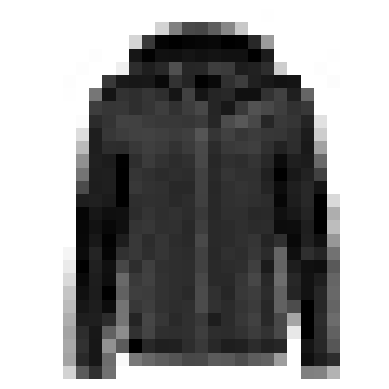

'Coat'

In [10]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer("dense") is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

##### Compiling the model

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7135 - accuracy: 0.7634 - val_loss: 0.5204 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4848 - accuracy: 0.8281 - val_loss: 0.4326 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4370 - accuracy: 0.8462 - val_loss: 0.4979 - val_accuracy: 0.8108
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4097 - accuracy: 0.8571 - val_loss: 0.3902 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3912 - accuracy: 0.8629 - val_loss: 0.3740 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3732 - accuracy: 0.8675 - val_loss: 0.3672 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3608 - accuracy: 0.8721 - val_loss: 0.3632 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
len(history.epoch)

30

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

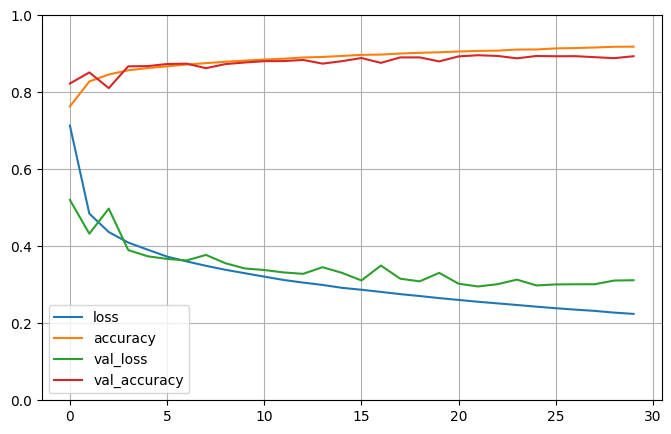

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.3444 - accuracy: 0.8796


[0.34439557790756226, 0.8795999884605408]

##### Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 981us/step - loss: 2.0284 - val_loss: 1.6952
Epoch 2/20
363/363 [==============================] - 0s 815us/step - loss: 0.7961 - val_loss: 0.7315
Epoch 3/20
363/363 [==============================] - 0s 773us/step - loss: 0.7056 - val_loss: 0.6891
Epoch 4/20
363/363 [==============================] - 0s 776us/step - loss: 0.6606 - val_loss: 0.6094
Epoch 5/20
363/363 [==============================] - 0s 795us/step - loss: 0.6234 - val_loss: 0.5734
Epoch 6/20
363/363 [==============================] - 0s 782us/step - loss: 0.5919 - val_loss: 0.5544
Epoch 7/20
363/363 [==============================] - 0s 765us/step - loss: 0.5674 - val_loss: 0.5499
Epoch 8/20
363/363 [==============================] - 0s 803us/step - loss: 0.5478 - val_loss: 0.5056
Epoch 9/20
363/363 [==============================] - 0s 876us/step - loss: 0.5305 - val_loss: 0.4951
Epoch 10/20
363/363 [==============================] - 0s 796us/step - loss: 0.516

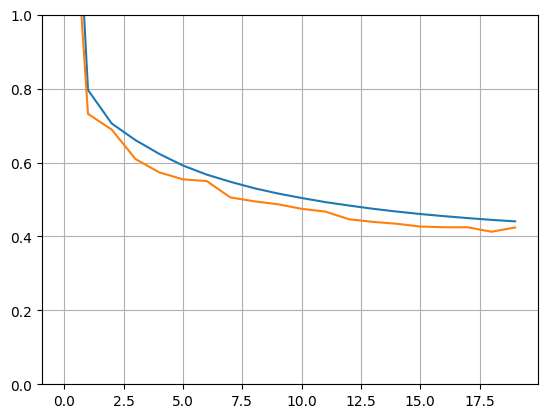

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 534us/step - loss: 0.4378


0.4378136396408081

In [35]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.5926507],
       [1.6693637],
       [3.3452914]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [39]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [41]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, 
          validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0445 - val_loss: 0.8698
Epoch 2/20
363/363 [==============================] - 0s 867us/step - loss: 0.7261 - val_loss: 0.6720
Epoch 3/20
363/363 [==============================] - 0s 866us/step - loss: 0.6082 - val_loss: 0.5813
Epoch 4/20
363/363 [==============================] - 0s 936us/step - loss: 0.5626 - val_loss: 0.5210
Epoch 5/20
363/363 [==============================] - 0s 937us/step - loss: 0.5374 - val_loss: 0.4933
Epoch 6/20
363/363 [==============================] - 0s 866us/step - loss: 0.5146 - val_loss: 0.4751
Epoch 7/20
363/363 [==============================] - 0s 872us/step - loss: 0.4994 - val_loss: 0.4616
Epoch 8/20
363/363 [==============================] - 0s 858us/step - loss: 0.4837 - val_loss: 0.4448
Epoch 9/20
363/363 [==============================] - 0s 859us/step - loss: 0.4694 - val_loss: 0.4324
Epoch 10/20
363/363 [==============================] - 0s 837us/step - loss: 0.4586 

In [42]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 559us/step - loss: 0.4172


0.4172118306159973

In [43]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.4081626],
       [1.9475429],
       [3.2027707]], dtype=float32)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.7090 - main_output_loss: 2.2596 - aux_output_loss: 6.7533 - val_loss: 1.4732 - val_main_output_loss: 1.0676 - val_aux_output_loss: 5.1229
Epoch 2/20
363/363 [==============================] - 0s 994us/step - loss: 1.1218 - main_output_loss: 0.7941 - aux_output_loss: 4.0713 - val_loss: 0.9678 - val_main_output_loss: 0.7124 - val_aux_output_loss: 3.2664
Epoch 3/20
363/363 [==============================] - 0s 926us/step - loss: 0.8768 - main_output_loss: 0.6755 - aux_output_loss: 2.6886 - val_loss: 0.8699 - val_main_output_loss: 0.6451 - val_aux_output_loss: 2.8936
Epoch 4/20
363/363 [==============================] - 0s 933us/step - loss: 0.7669 - main_output_loss: 0.6272 - aux_output_loss: 2.0245 - val_loss: 0.8117 - val_main_output_loss: 0.5980 - val_aux_output_loss: 2.7350
Epoch 5/20
363/363 [==============================] - 0s 944us/step - loss: 0.7071 - main_output_loss: 0.5970 - aux_output_loss: 1.6975 - 

In [45]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 600us/step - loss: 0.4951 - main_output_loss: 0.4373 - aux_output_loss: 1.0154


[0.49507513642311096, 0.43725845217704773, 1.0154237747192383]

In [46]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.5986124],
        [1.85446  ],
        [3.3311796]], dtype=float32),
 array([[1.3850359],
        [1.943497 ],
        [2.4332373]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [48]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
          validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.8140 - output_1_loss: 2.6142 - output_2_loss: 4.6119 - val_loss: 1.9943 - val_output_1_loss: 1.5885 - val_output_2_loss: 5.6461
Epoch 2/20
363/363 [==============================] - 0s 901us/step - loss: 1.1026 - output_1_loss: 0.8322 - output_2_loss: 3.5363 - val_loss: 1.2157 - val_output_1_loss: 0.6937 - val_output_2_loss: 5.9139
Epoch 3/20
363/363 [==============================] - 0s 925us/step - loss: 0.8829 - output_1_loss: 0.6783 - output_2_loss: 2.7241 - val_loss: 1.1227 - val_output_1_loss: 0.6318 - val_output_2_loss: 5.5402
Epoch 4/20
363/363 [==============================] - 0s 920us/step - loss: 0.7882 - output_1_loss: 0.6266 - output_2_loss: 2.2431 - val_loss: 1.0475 - val_output_1_loss: 0.5884 - val_output_2_loss: 5.1797
Epoch 5/20
363/363 [==============================] - 0s 942us/step - loss: 0.7284 - output_1_loss: 0.5917 - output_2_loss: 1.9585 - val_loss: 0.9767 - val_output_1_loss: 0.5496 

In [49]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test)) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 611us/step - loss: 0.4910 - output_1_loss: 0.4215 - output_2_loss: 1.1168


[0.4910449683666229, 0.4215121865272522, 1.1168415546417236]

In [50]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.42374977],
        [1.9527388 ],
        [3.1413999 ]], dtype=float32),
 array([[1.2839363],
        [1.8859391],
        [2.6866937]], dtype=float32))

#### Saving and Restoring a Model

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid));

Epoch 1/10
363/363 [==============================] - 1s 981us/step - loss: 1.6707 - val_loss: 0.7578
Epoch 2/10
363/363 [==============================] - 0s 902us/step - loss: 0.7303 - val_loss: 0.8104
Epoch 3/10
363/363 [==============================] - 0s 813us/step - loss: 0.6553 - val_loss: 0.6233
Epoch 4/10
363/363 [==============================] - 0s 814us/step - loss: 0.6079 - val_loss: 0.5501
Epoch 5/10
363/363 [==============================] - 0s 831us/step - loss: 0.5746 - val_loss: 0.5241
Epoch 6/10
363/363 [==============================] - 0s 821us/step - loss: 0.5466 - val_loss: 0.4995
Epoch 7/10
363/363 [==============================] - 0s 818us/step - loss: 0.5241 - val_loss: 0.4999
Epoch 8/10
363/363 [==============================] - 0s 828us/step - loss: 0.5045 - val_loss: 0.4621
Epoch 9/10
363/363 [==============================] - 0s 821us/step - loss: 0.4873 - val_loss: 0.4515
Epoch 10/10
363/363 [==============================] - 0s 815us/step - loss: 0.472

In [64]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 539us/step - loss: 0.4599


0.45993340015411377

In [65]:
model.predict(X_new)

1/1 [==============================] - 0s 12ms/step


array([[0.6419035],
       [1.442482 ],
       [3.3937926]], dtype=float32)

In [66]:
model.save("data/temp/model.keras")
model = keras.models.load_model("data/temp/model.keras")

In [67]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 541us/step - loss: 0.4599


0.45993340015411377

In [68]:
model.predict(X_new)

1/1 [==============================] - 0s 43ms/step


array([[0.6419035],
       [1.442482 ],
       [3.3937926]], dtype=float32)